# 1. Import một số thư viện cần thiết

In [ ]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

In [ ]:
MSN = pd.read_csv("MSN.csv")

In [ ]:
MSN

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,89000.0,89000.0,89200.0,88200.0,683.44K,0.11%
1,3/4/2019,89500.0,89100.0,91400.0,89000.0,1.28M,0.56%
2,3/5/2019,89400.0,89500.0,90900.0,89300.0,772.09K,-0.11%
3,3/6/2019,90000.0,90000.0,90200.0,89300.0,695.52K,0.67%
4,3/7/2019,90000.0,90700.0,91000.0,89800.0,947.51K,0.00%
...,...,...,...,...,...,...,...
1263,3/19/2024,77400.0,77900.0,79400.0,77200.0,3.13M,-0.64%
1264,3/20/2024,77300.0,77400.0,77800.0,76500.0,4.24M,-0.13%
1265,3/21/2024,78000.0,78500.0,78800.0,77600.0,4.98M,0.91%
1266,3/22/2024,78500.0,79800.0,82700.0,78300.0,6.02M,0.64%


# 2. Tiền xử lý dữ liệu

### Loại bỏ một số dữ liệu trống trong dataset

In [ ]:
# Drop missing values
MSN = MSN.dropna()
# Reset the index
MSN = MSN.reset_index(drop=True)

### Chuyển dữ liệu cột Price sang dạng float

In [ ]:
MSN["Price"]=MSN["Price"].astype(float)

# 3. Trực quan hóa tập dữ liệu ban đầu bằng biểu đồ

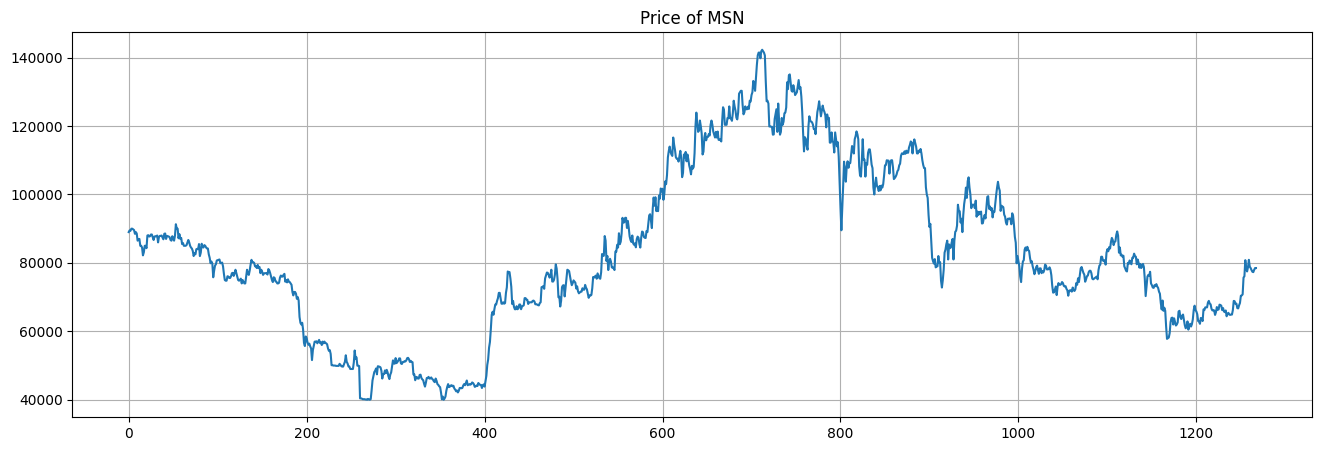

In [ ]:
# Illustrated representation of Close Stock Price
plt.figure(figsize=(16,5))
plt.plot(MSN["Price"])
plt.title('Price of MSN')
plt.grid(True)
plt.show()

# 4. Chia tập dữ liệu để train-test-validate theo tỉ lệ 7:2:1

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(MSN))
test_size = int(0.2 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [ ]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1> Quá trình training

In [ ]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [ ]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [ ]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [ ]:
#Tạo index cho 30 ngày tiếp theo
last_index =  MSN.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[140904.96001238 140973.79252036 141042.62502835 141111.45753633
 141180.29004432 141249.1225523  141317.95506029 141386.78756827
 141455.62007626 141524.45258424 141593.28509223 141662.11760021
 141730.9501082  141799.78261619 141868.61512417 141937.44763216
 142006.28014014 142075.11264813 142143.94515611 142212.7776641
 142281.61017208 142350.44268007 142419.27518805 142488.10769604
 142556.94020402 142625.77271201 142694.60521999 142763.43772798
 142832.27023597 142901.10274395]


In [ ]:
#Tạo index cho 30 ngày tiếp theo
last_index =  MSN.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

<h1>Đánh giá độ chính xác của thuật toán

In [ ]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 68633.97973597747
Testing RMSE: 40688.19415888999


In [ ]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 68399.63824732097
Testing MAE: 38391.40565397795


In [ ]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 101.72673882686726
Testing MAPE: 47.41298799076313


<h1>Vẽ hình mô tả dự đoán

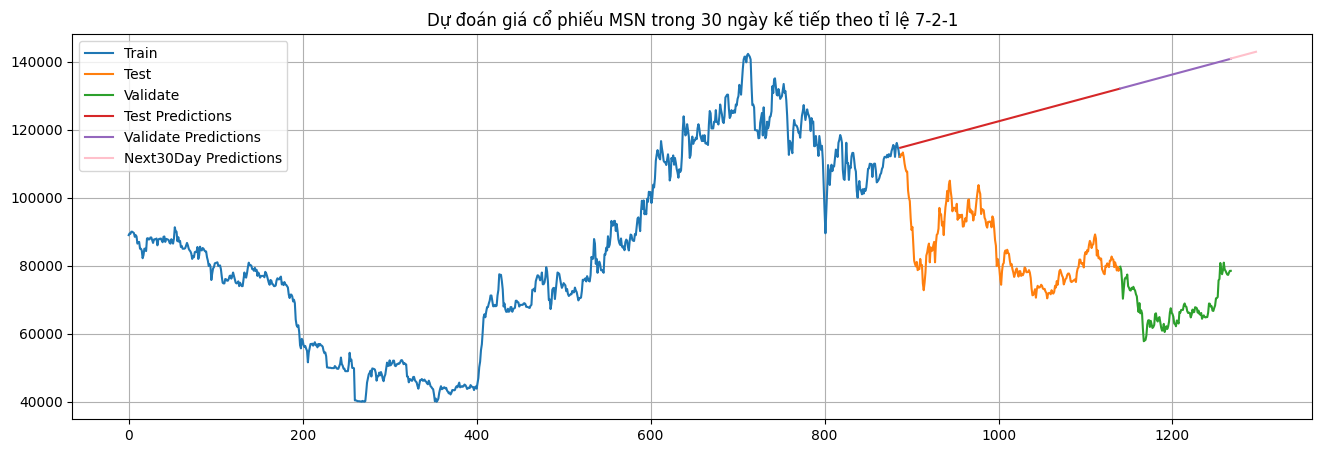

In [ ]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu MSN trong 30 ngày kế tiếp theo tỉ lệ 7-2-1")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 5. Chia tập dữ liệu để train-test-validate theo tỉ lệ 6:3:1

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(MSN))
test_size = int(0.3 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [ ]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1>Quá trình training

In [ ]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1>Quá trình testing

In [ ]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [ ]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [ ]:
#Tạo index cho 30 ngày tiếp theo
last_index =  MSN.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[138799.45326607 138866.25523195 138933.05719784 138999.85916372
 139066.6611296  139133.46309549 139200.26506137 139267.06702725
 139333.86899314 139400.67095902 139467.4729249  139534.27489078
 139601.07685667 139667.87882255 139734.68078843 139801.48275432
 139868.2847202  139935.08668608 140001.88865197 140068.69061785
 140135.49258373 140202.29454962 140269.0965155  140335.89848138
 140402.70044726 140469.50241315 140536.30437903 140603.10634491
 140669.9083108  140736.71027668]


<h1>Đánh giá độ chính xác của thuật toán

In [ ]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 66664.75797466736
Testing RMSE: 32367.83580521239


In [ ]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 66425.1014666112
Testing MAE: 26797.353299738326


In [ ]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 98.80878890236974
Testing MAPE: 32.306326692653975


<h1>Vẽ hình mô tả dự đoán

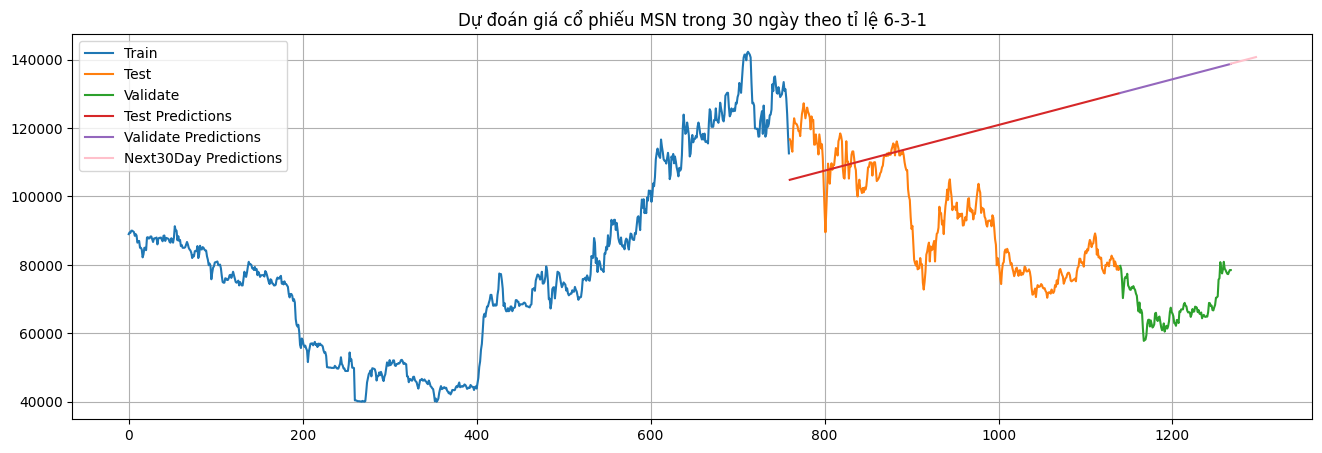

In [ ]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.grid(True)
plt.title("Dự đoán giá cổ phiếu MSN trong 30 ngày theo tỉ lệ 6-3-1")
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color="pink")
plt.legend(['Train', 'Test','Validate', 'Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()

# 6. Chia tập dữ liệu để train-test-validate theo tỉ lệ 5:3:2

In [ ]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(MSN))
test_size = int(0.3 * len(MSN))
val_size = len(MSN) - train_size - test_size

In [ ]:
train_data = MSN[:train_size]
test_data = MSN[train_size:train_size+test_size]
val_data = MSN[train_size+test_size:]

<h1> Quá trình training

In [ ]:
#Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

<h1> Quá trình testing

In [ ]:
# Testing data
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

<h1>Quá trình validate

In [ ]:
#Validate data
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

<h1>Quá trình dự đoán giá cổ phiếu trong 30 ngày tiếp theo

In [ ]:
#Tạo index cho 30 ngày tiếp theo
last_index =  MSN.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

#Dự đoán giá đóng cửa của cổ phiếu trong 30 ngày tiếp theo
y_next_30_days = model.predict(x_next_30_days)

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[82278.3875637  82290.7980325  82303.2085013  82315.61897011
 82328.02943891 82340.43990771 82352.85037651 82365.26084532
 82377.67131412 82390.08178292 82402.49225172 82414.90272052
 82427.31318933 82439.72365813 82452.13412693 82464.54459573
 82476.95506454 82489.36553334 82501.77600214 82514.18647094
 82526.59693974 82539.00740855 82551.41787735 82563.82834615
 82576.23881495 82588.64928375 82601.05975256 82613.47022136
 82625.88069016 82638.29115896]


<h1>Đánh giá độ chính xác của thuật toán

In [ ]:
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 10740.165059504636
Testing RMSE: 36756.58707198488


In [ ]:
#MAE
valid_mae = mean_absolute_error(y_val,y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 8503.750498923388
Testing MAE: 32791.405738957306


In [ ]:
#MAPE
valid_mape = np.mean(np.abs((y_val - y_pred_val) / y_val))*100
test_mape = np.mean(np.abs((y_test - y_pred) / y_test))*100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation MAPE: 12.593750548776875
Testing MAPE: 28.26931205379862


<h1>Vẽ hình mô tả dự đoán

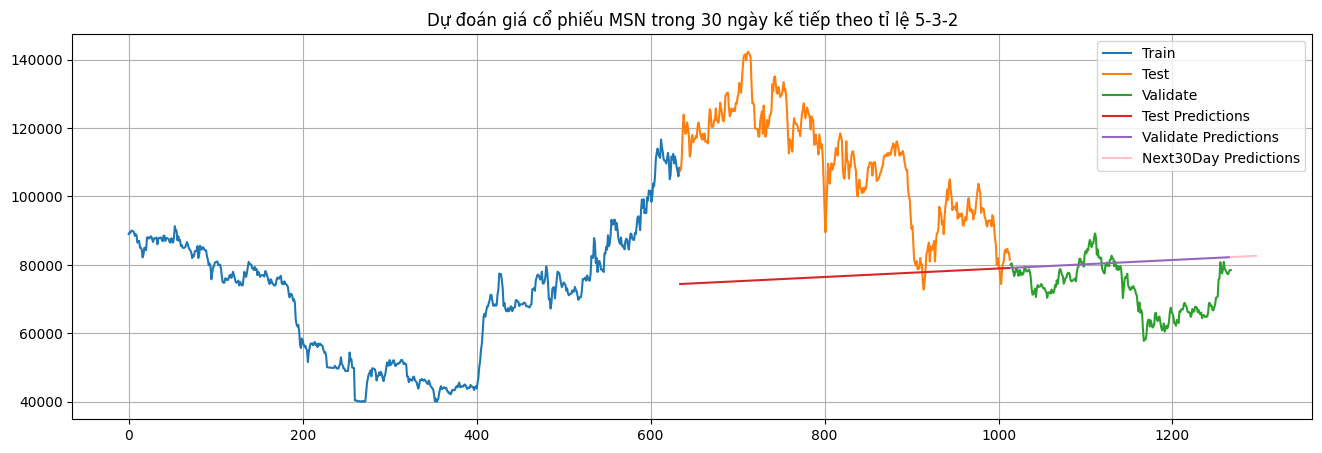

In [ ]:
#Drawing plot
plt.figure(figsize=(16,5))
plt.title("Dự đoán giá cổ phiếu MSN trong 30 ngày kế tiếp theo tỉ lệ 5-3-2")
plt.grid(True)
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days, color ="pink")
plt.legend(['Train', 'Test', 'Validate','Test Predictions','Validate Predictions','Next30Day Predictions'])
plt.show()